In [140]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
import math
import numpy as np

In [144]:
times = []
f = open('times.txt', 'r')
for line in f: #reads strings from .txt file
    times.append(line.strip('\n'))
    
datetimes = [] 
for time in times: #parses dates from the strings
    try:
        datetimes.append(datetime.strptime(time, '%Y-%m-%d %H:%M:%S.%f'))
    except:
        try:
            datetimes.append(datetime.strptime(time, '%Y-%m-%d %H:%M:%S:%f'))
        except:
            datetimes.append(datetime.strptime(time, '%Y-%m-%d %H:%M:%S'))
            

truedelta = datetimes[len(datetimes)-1]-datetimes[0]
start = datetimes[0]
datetimes = sorted(datetimes)
datetimes = [time for time in datetimes if time-start <= truedelta]

collectedtimes = []
collectedmsgs = []
logmsgs = []
i = 0
while (datetimes[len(datetimes)-1] - datetimes[i]).seconds > 30: #splits data into 30-second chunks to check message frequency
    j = 0
    runningmsgs = 0
    while (datetimes[i+j] - datetimes[i]).seconds < 30:
        runningmsgs += 1
        j += 1
    collectedmsgs.append(runningmsgs)
    logmsgs.append(math.log(runningmsgs))
    runningmsgs = 0
    collectedtimes.append((datetimes[i]-datetimes[0]).seconds + 15)
    i += j

In [145]:
N = 15
cumsum, msgs_movmean = [0], []
for i, x in enumerate(df['msgs'], 1):
    cumsum.append(cumsum[i-1] + x)
    if i>=N:
        moving_ave = (cumsum[i] - cumsum[i-N])/N
        msgs_movmean.append(moving_ave)
        
N = 15
cumsum, ts_movmean = [0], []
for i, x in enumerate(df['times'], 1):
    cumsum.append(cumsum[i-1] + x)
    if i>=N:
        moving_ave = (cumsum[i] - cumsum[i-N])/N
        ts_movmean.append(moving_ave)
        
diffs = []
for i in range(len(msgs_movmean)):
    diffs.append(df['msgs'][i+int((len(df['msgs'])-len(msgs_movmean))/2)] - msgs_movmean[i])

In [238]:
spikes = []
for i in df['msgs']:
    spikiness = df['msgs'][i] - df['msgs'].rolling(15).median()[i]
    spikes.append(spikiness)
    
len(spikes)

669

highlights:
['00h50m04s', '02h36m13s', '02h45m46s', '05h34m17s', '05h18m40s', '02h24m06s', '02h26m08s', '03h35m45s', '04h38m14s', '02h20m04s']


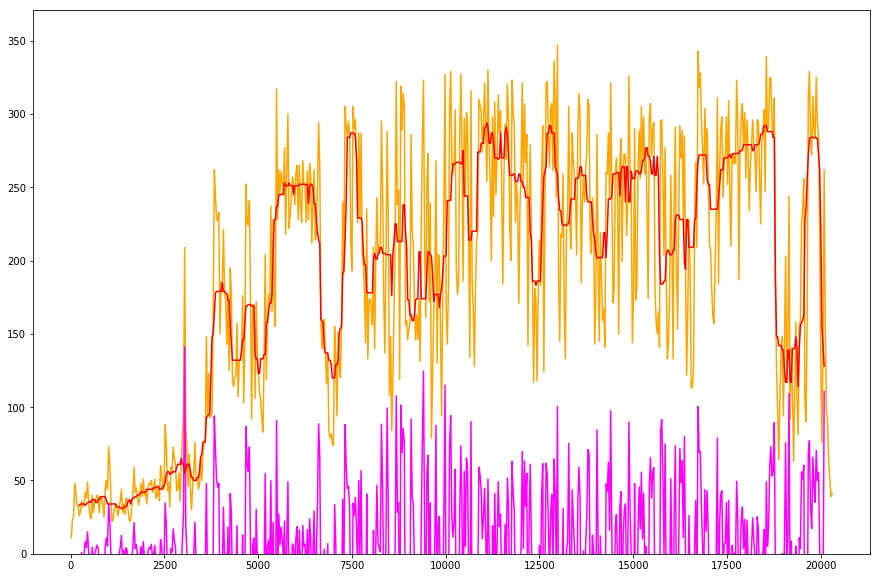

In [252]:
df = pd.DataFrame({'times':collectedtimes, 'msgs':collectedmsgs, 'logmsgs':logmsgs})
df = df.sort_values(by='times')

# meandf = pd.DataFrame({'times':ts_movmean, 'diffs':diffs})

fig, ax = plt.subplots(figsize=(15,10))
plt.plot(df['times'], df['msgs'], color='orange')
# plt.plot(ts_movmean, msgs_movmean, color='red')
plt.plot(meandf['times'], meandf['diffs'], color='magenta')
# plt.plot(df['times'], df['msgs'].rolling(15).std(), color='blue')
plt.plot(df['times'].rolling(15).median(), df['msgs'].rolling(15).median(), color='red')
# plt.plot(df['times'].rolling(15).median(), spikes, color='green')

# plt.xlim(0,7500)
plt.ylim(0)

highlights = []
for x in range(10):
    t = meandf.sort_values(by='diffs', ascending=False).iloc[x]['times'] - 35
    highlights.append(str(int(t/3600)).zfill(2) + 'h' + str(int(t%3600/60)).zfill(2) + 'm' + str(int(t%3600%60)).zfill(2) + 's')

print("highlights:")
print(highlights)

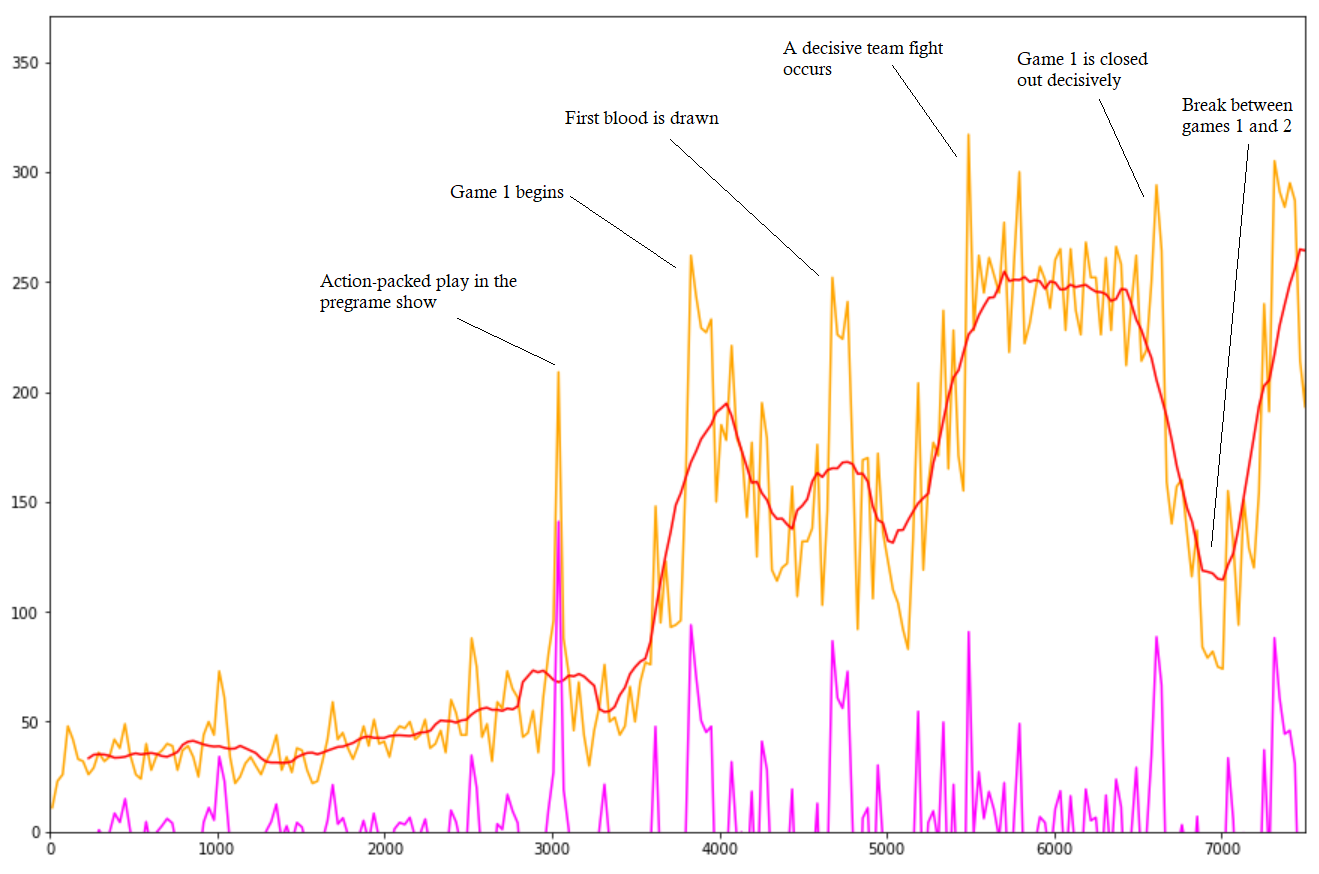

In [194]:
from IPython.display import Image
Image(filename='annotated.png')

In [150]:
sents = []
f = open('sents.txt', 'r')
for line in f:
    sents.append(float(line.strip('\n')))
ts = np.arange(len(sents))

N = 15
cumsum, sents_movmean = [0], []
for i, x in enumerate(sents, 1):
    cumsum.append(cumsum[i-1] + x)
    if i>=N:
        moving_ave = (cumsum[i] - cumsum[i-N])/N
        sents_movmean.append(moving_ave)
        
N = 15
cumsum, senttimes_movmean = [0], []
for i, x in enumerate(ts, 1):
    cumsum.append(cumsum[i-1] + x)
    if i>=N:
        moving_ave = (cumsum[i] - cumsum[i-N])/N
        senttimes_movmean.append(moving_ave)
        
sentdiffs = []
for i in range(len(sents_movmean)):
    sentdiffs.append(sents[i+int((len(sents)-len(sents_movmean))/2)] - sents_movmean[i])

highlights:
['04h16m09s', '01h45m09s', '01h25m57s', '05h29m20s', '05h06m38s', '04h16m39s', '03h07m29s', '04h15m39s', '01h41m37s', '01h17m55s']


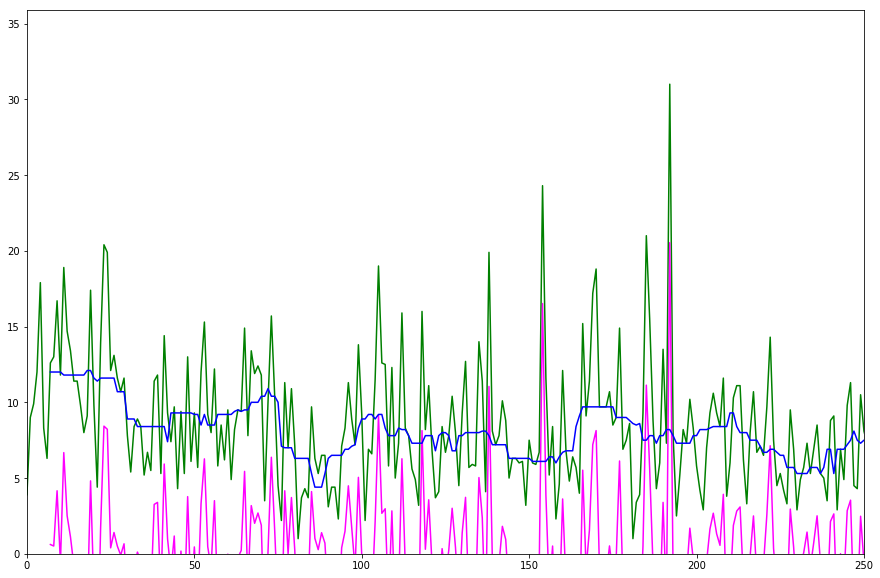

In [208]:
sentdf = pd.DataFrame({'times':ts, 'sents':sents})
sentmeandf = pd.DataFrame({'times':senttimes_movmean, 'diffs':sentdiffs})

fig, ax = plt.subplots(figsize=(15,10))
plt.plot(sentdf['times'], sentdf['sents'], color='green')
# plt.plot(senttimes_movmean, sents_movmean, color='blue')
plt.plot(sentmeandf['times'], sentmeandf['diffs'], color='magenta')
plt.plot(sentdf['times'].rolling(15).median(), sentdf['sents'].rolling(15).median(), color='blue')

plt.xlim(0,250)
plt.ylim(0)

highlights = []
for x in range(10):
    t = int(sentmeandf.sort_values(by='diffs', ascending=False).iloc[x]['times'])
    off = int((len(meandf["times"]) - len(sentmeandf["times"]))/ 2)
    t = meandf["times"].iloc[t + off]
    highlights.append(str(int(t/3600)).zfill(2) + 'h' + str(int(t%3600/60)).zfill(2) + 'm' + str(int(t%3600%60)).zfill(2) + 's')

print("highlights:")
print(highlights)

highlights:
['00h50m04s', '01h33m35s', '01h57m22s', '01h58m40s', '02h50m26s', '03h08m10s', '03h20m20s', '04h01m37s', '04h46m22s', '05h02m55s']


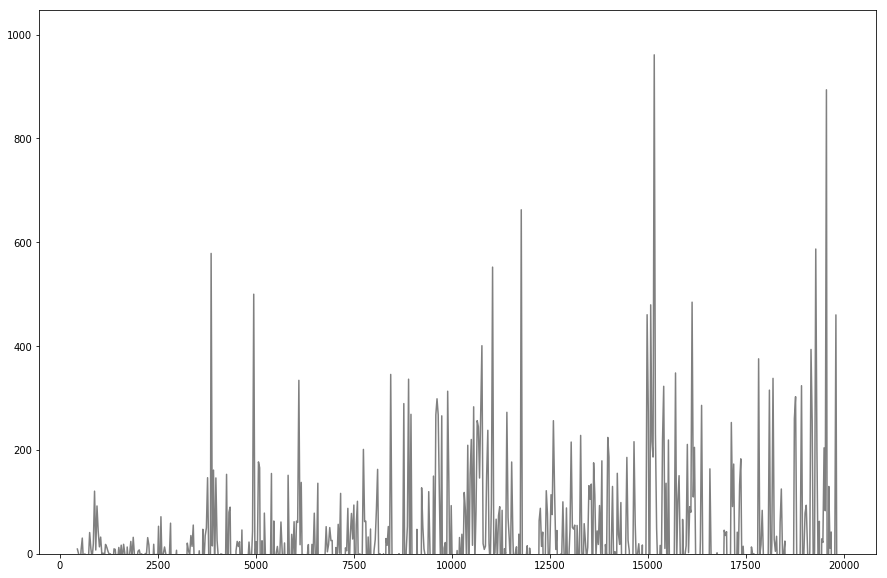

In [199]:
finaltimes = []
metric = []
for i in range(sentmeandf.shape[0]):
    finaltimes.append(meandf.iloc[i+off]['times'])
    metric.append(meandf.iloc[i+off]['diffs'] * sentmeandf.iloc[i]['diffs'])

fig, ax = plt.subplots(figsize=(15,10))
plt.plot(finaltimes, metric, color='gray')
plt.ylim(0)

finaldf = pd.DataFrame({'times':finaltimes, 'metric':metric})
highlights = []

for x in range(10):
    t = meandf.sort_values(by='diffs', ascending=False).iloc[x]['times'] - 35
    highlights.append(str(int(t/3600)).zfill(2) + 'h' + str(int(t%3600/60)).zfill(2) + 'm' + str(int(t%3600%60)).zfill(2) + 's')

print("highlights:")
print(highlights)